# [↩️ 리스트로 돌아가기](https://dacon.io/competitions/open/235698/overview/description)

# 셀을 실행할 때 팝업이 뜨면 `무시하고 계속하기` 를 눌러주세요


## 데이터 다운로드
---
아래 셀을 실행시켜 데이터를 colab 에 불러옵니다.
셀 실행은 Ctrl + Enter 를 이용해 실행시킬 수 있습니다.

In [1]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

--2023-06-15 06:27:23--  https://bit.ly/3i4n1QB
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw [following]
--2023-06-15 06:27:23--  https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw
Resolving drive.google.com (drive.google.com)... 74.125.142.102, 74.125.142.139, 74.125.142.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/r569u9ed48g8n38bhkua3qraqts07ocp/1686810375000/17946651057176172524/*/1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw?e=download&uuid=e65f055f-2e17-4926-90ce-72bbaaaedd73 [following]
--2023-06-15 06:27:24--  https://doc-10-10-docs.go

In [2]:
# 라이브러리 불러오기
import seaborn as sns
import pandas as pd

# VIF기능을 제공하는 라이브러리 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
train = pd.read_csv('data/train.csv')
print(train)
print(type(train))

      index  quality  fixed acidity  volatile acidity  citric acid  \
0         0        5            5.6             0.695         0.06   
1         1        5            8.8             0.610         0.14   
2         2        5            7.9             0.210         0.39   
3         3        6            7.0             0.210         0.31   
4         4        6            7.8             0.400         0.26   
...     ...      ...            ...               ...          ...   
5492   5492        5            7.7             0.150         0.29   
5493   5493        6            6.3             0.180         0.36   
5494   5494        7            7.8             0.150         0.34   
5495   5495        5            6.6             0.410         0.31   
5496   5496        6            7.0             0.350         0.17   

      residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0                6.8      0.042                  9.0                  84.0   
1  

## 👋 실습
---


### seaborn pairplot

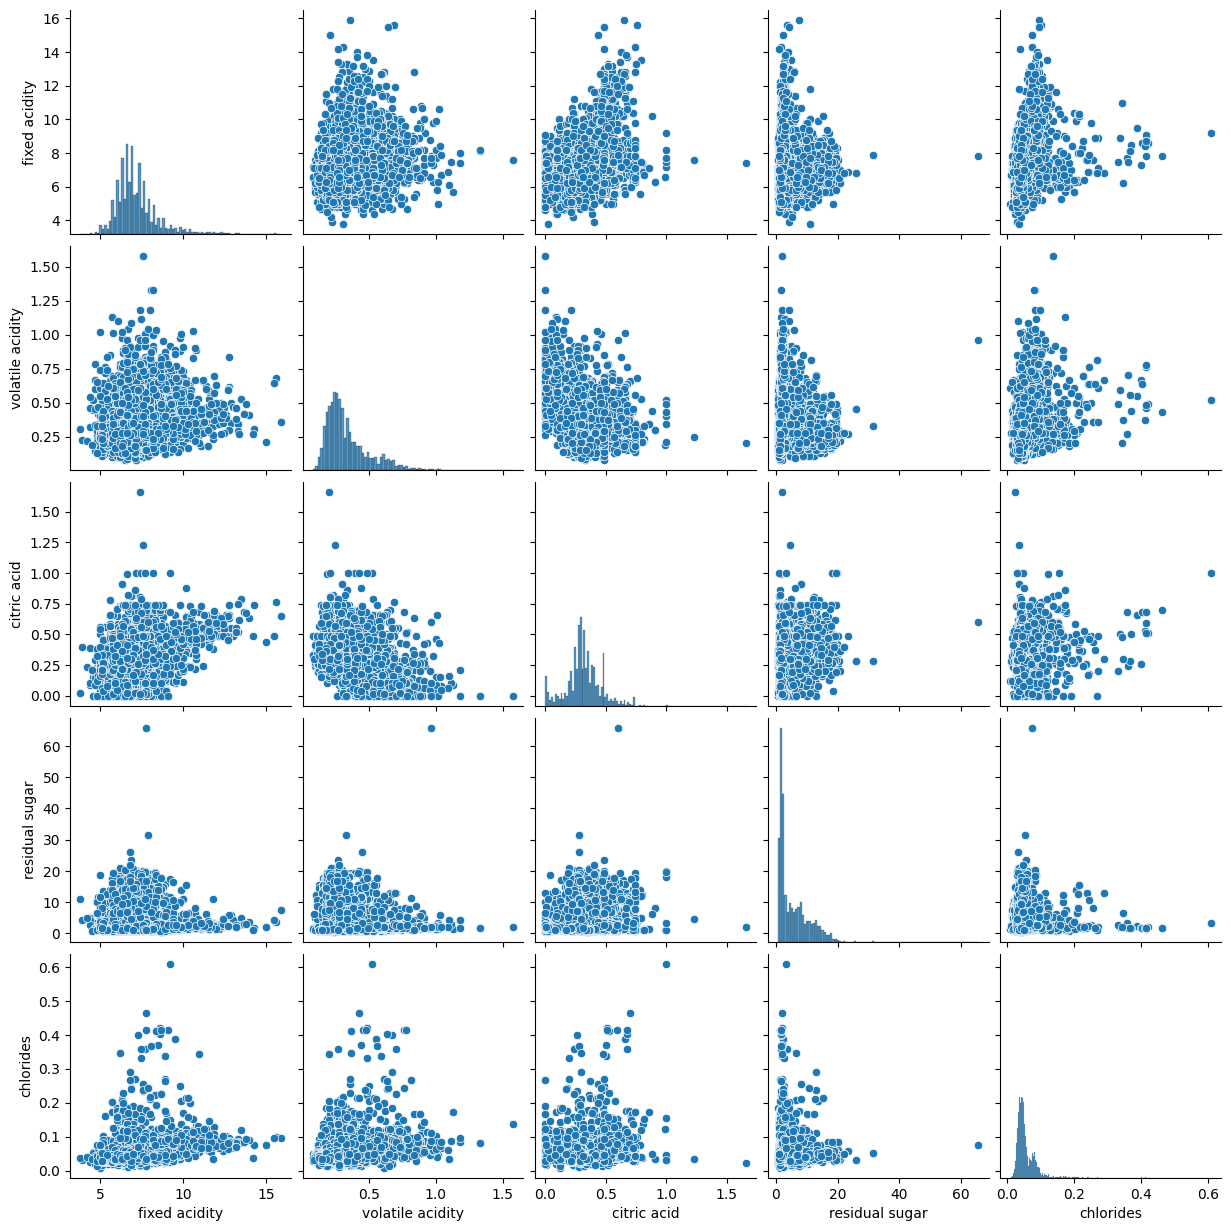

In [9]:
# "data"라는 변수에 train의 "fixed acidity"부터 "chlorides"까지의 변수를 저장해주세요
data = train.loc[:,"fixed acidity":"chlorides"]
# data의 pairplot을 그려보세요
sns.pairplot(data)

### seaborn distplot

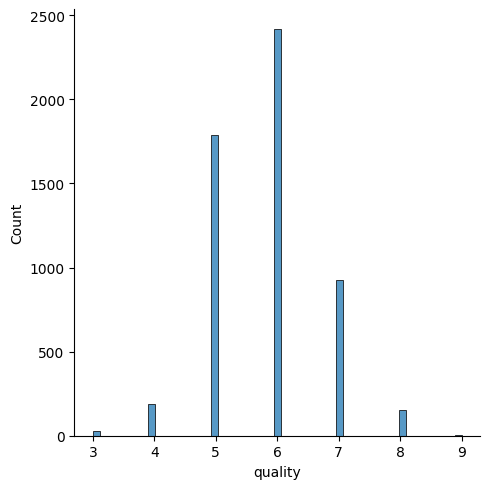

In [10]:
# 히스토그램을 그릴 변수 지정(변수는 1개만)
data_quality = train['quality']
#distplot 함수로 히스토그램을 그립니다.
sns.displot(data_quality)

### seaborn heatmap

<Axes: >

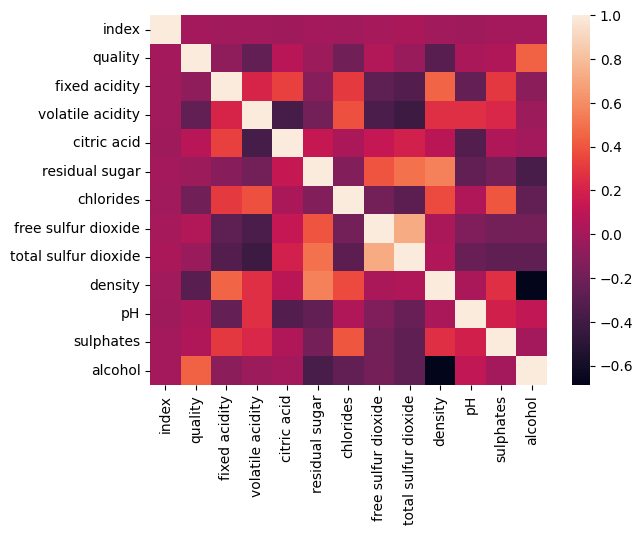

In [11]:
# 히트맵 그래프를 그릴 변수 지정 (train.corr() )
data_heatmap = train.corr()
# corr() 함수는 데이터의 변수간의 상관도를 출력하는 함수 입니다.

# seaborn 의 heatmap 함수를 이용해 히트맵 그래프를 그립니다.
sns.heatmap(data_heatmap)

### seaborn Scatter plot

<Axes: xlabel='fixed acidity', ylabel='pH'>

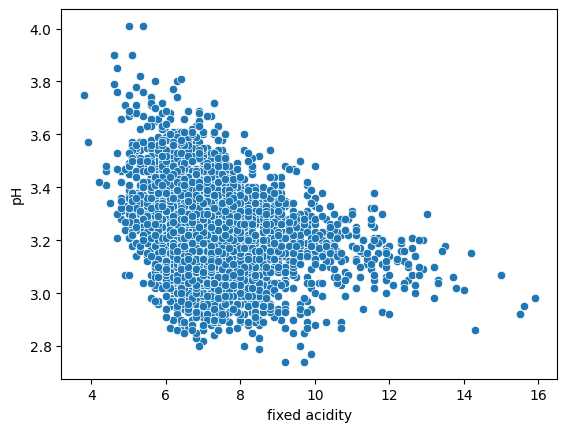

In [12]:
# Scatter Plot을 그릴 변수 지정 (


# seaborn 의 scatterplot함수를 이용해 그래프를 그립니다.
data_x = train['fixed acidity']
data_y =train['pH']

sns.scatterplot(x = data_x,y = data_y)


## VIF

In [4]:
# train 데이터중 카테고리형 변수인 'type' 변수 제거
train.drop('type',inplace = True,axis=1)

# 결과값을 저장할 VIF라는 이름의 리스트 생성
VIF = []

# values atribution(속성) 이용해 train 데이터의 값만 추출
train_val = train.values

#  variance_inflation_factor 함수에 인자로 train_val (train 데이터의 값)과 인덱스 번호 지정  - for 반복문 이용
for i in range(len(train.columns)):
    VIF.append(variance_inflation_factor(train_val,i))


In [6]:
VIF

[4.007175138928272,
 64.10743200252591,
 59.14918709853955,
 9.610687118796196,
 9.273443884294641,
 3.616414435307183,
 5.7159808829777585,
 8.420882621285777,
 14.833789006276412,
 945.3239910887048,
 583.5011867251005,
 18.535849630077276,
 131.12669981396292]

In [8]:
# 데이터 프레임 형식으로 바꿔 가독성 높이기! (보너스 문제)

vif_dataframe = pd.DataFrame()
vif_dataframe['columns'] = train.columns
vif_dataframe['VIF'] = VIF
vif_dataframe

,columns,VIF
0,index,4.007175
1,quality,64.107432
2,fixed acidity,59.149187
3,volatile acidity,9.610687
4,citric acid,9.273444
5,residual sugar,3.616414
6,chlorides,5.715981
7,free sulfur dioxide,8.420883
8,total sulfur dioxide,14.833789
9,density,945.323991


## 정답
---

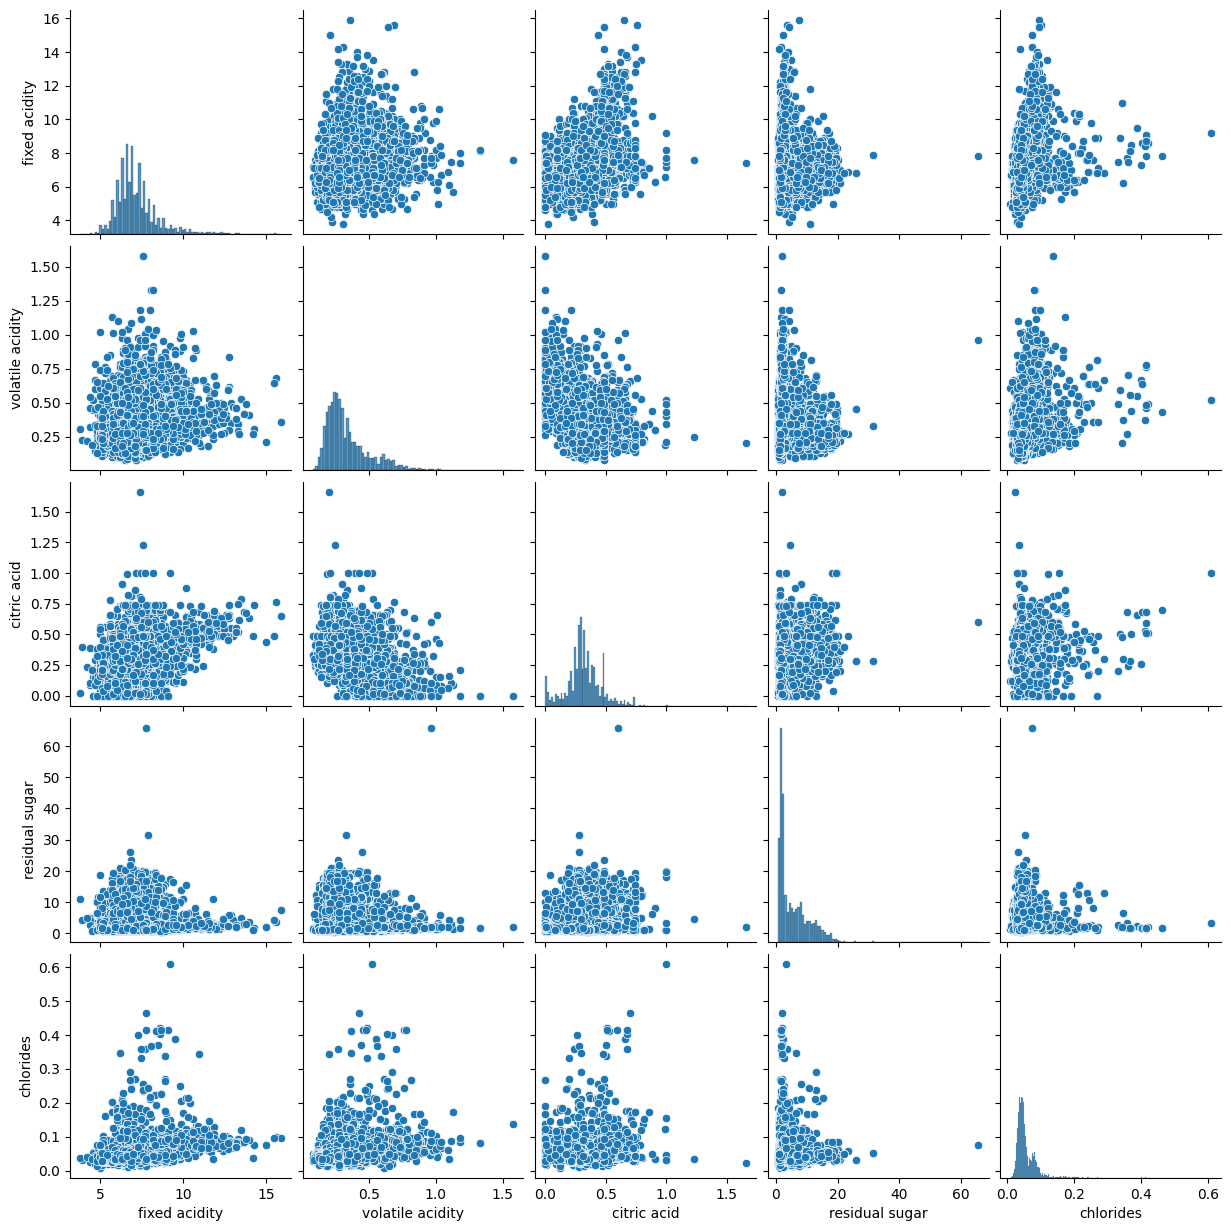

In [13]:
# "data"라는 변수에 train의 "fixed acidity"부터 "chlorides"까지의 변수를 저장해주세요

data = train.loc[:, 'fixed acidity' : 'chlorides']



# data의 pairplot을 그려보세요

sns.pairplot(data)

<ipython-input-14-edc2ba72df33>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,bins = 100)


<Axes: xlabel='fixed acidity', ylabel='Density'>

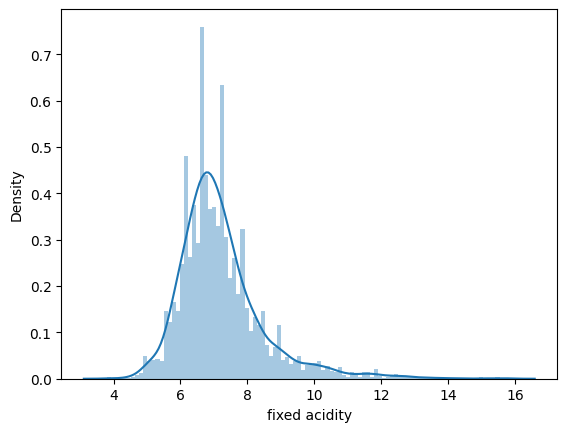

In [14]:
# 히스토그램을 그릴 변수 지정(변수는 1개만)

data = train['fixed acidity']



#distplot 함수로 히스토그램을 그립니다.

sns.distplot(data,bins = 100)

<Axes: >

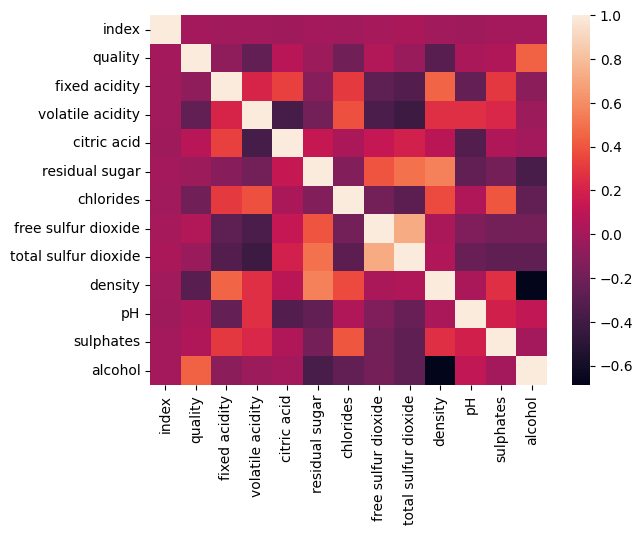

In [15]:
# 히트맵 그래프를 그릴 변수 지정 (train.corr() )

# corr() 함수는 데이터의 변수간의 상관도를 출력하는 함수 입니다.

data = train.corr()



# seaborn 의 heatmap 함수를 이용해 히트맵 그래프를 그립니다.

sns.heatmap(data)

<Axes: xlabel='residual sugar', ylabel='density'>

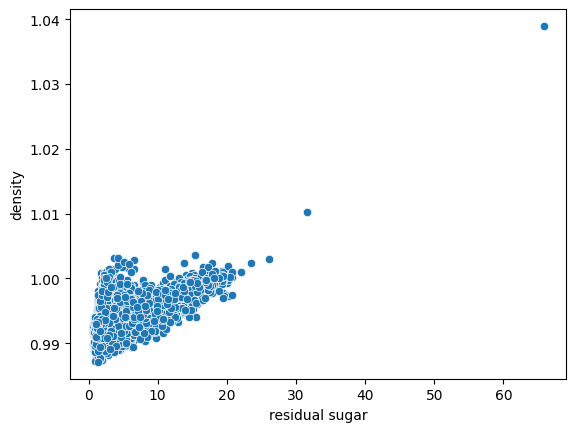

In [16]:
# Scatter Plot을 그릴 변수 지정 (

x_data = train['residual sugar']

y_data = train['density']



# seaborn 의 scatterplot함수를 이용해 그래프를 그립니다.

sns.scatterplot(x = x_data, y = y_data )

In [18]:
# 피처마다의 VIF 계수를 출력합니다.


# 결과값을 저장할 VIF라는 이름의 리스트 생성
vif = []

# values atribution(속성) 이용해 train 데이터의 값만 추출
train_val = train.values

#  variance_inflation_factor 함수에 인자로 train_val (train 데이터의 값)과 인덱스 번호 지정
# for문 이용
for i in range(len(train.columns)):
  vif.append(variance_inflation_factor(train_val.values, i))


vif

AttributeError: ignored

In [21]:
# 결과값을 저장할 VIF라는 이름의 리스트 생성
VIF = []

# values atribution(속성) 이용해 train 데이터의 값만 추출
train_val = train.values

#  variance_inflation_factor 함수에 인자로 train_val (train 데이터의 값)과 인덱스 번호 지정  - for 반복문 이용
for i in range(len(train.columns)):
    VIF.append(variance_inflation_factor(train_val,i))


# [↩️ 리스트로 돌아가기](https://dacon.io/competitions/open/235698/overview/description)